In [5]:
import pandas as pd
import os


correct_csv = 'correct_predictions.csv'
incorrect_csv = 'incorrect_predictions.csv'

# Step 1: Initialize the CSV files with some initial data
def initialize_csv_files():
    
    if not os.path.isfile(correct_csv) or os.stat(correct_csv).st_size == 0:
        correct_df = pd.DataFrame([
            ['red', 'red', 'red', 'red', 'black'],
            ['black', 'black', 'black', 'black', 'red'],
            ['red', 'black', 'red', 'black', 'red']
        ], columns=['Previous_1', 'Previous_2', 'Previous_3', 'Previous_4', 'Next_Card'])
        correct_df.to_csv(correct_csv, index=False)
   
    if not os.path.isfile(incorrect_csv) or os.stat(incorrect_csv).st_size == 0:
        incorrect_df = pd.DataFrame([
            ['red', 'red', 'red', 'red', 'red'],
            ['black', 'black', 'black', 'black', 'black'],
            ['red', 'black', 'red', 'black', 'black']
        ], columns=['Previous_1', 'Previous_2', 'Previous_3', 'Previous_4', 'Next_Card'])
        incorrect_df.to_csv(incorrect_csv, index=False)
        
initialize_csv_files()
print("Initialized CSV files for correct and incorrect predictions.")





Initialized CSV files for correct and incorrect predictions.


In [130]:
# Step 2: User Input for Previous Four Cards
def get_user_input():
    previous_cards = []
    for i in range(4):
        card = input(f"Enter the color of card {i+1} (red/black): ").strip().lower()
        if card not in ['red', 'black']:
            print("Invalid input. Please enter 'red' or 'black'.")
            return get_user_input()
        previous_cards.append(card)
    return previous_cards

previous_cards = get_user_input()
print(f"Previous cards: {previous_cards}")


Previous cards: ['black', 'black', 'red', 'black']


In [132]:
from collections import Counter

# Step 3: Prediction of the Next Card Color
def predict_next_card(previous_cards):
    correct_df = pd.read_csv(correct_csv)
    incorrect_df = pd.read_csv(incorrect_csv)
    
 
    df = pd.concat([correct_df, incorrect_df])
    
    filtered_df = df[(df['Previous_1'] == previous_cards[0]) & 
                     (df['Previous_2'] == previous_cards[1]) & 
                     (df['Previous_3'] == previous_cards[2]) & 
                     (df['Previous_4'] == previous_cards[3])]
    
    if not filtered_df.empty:
        next_card_counts = Counter(filtered_df['Next_Card'])
        predicted_card = next_card_counts.most_common(1)[0][0]
    else:
        
        predicted_card = 'red' if Counter(correct_df['Next_Card']).most_common(1)[0][0] == 'red' else 'black'
        
    return predicted_card

predicted_card = predict_next_card(previous_cards)
print(f"Predicted next card color: {predicted_card}")


Predicted next card color: red


In [133]:
# Step 4: User Confirmation
def confirm_prediction(predicted_card):
    actual_card = input(f"Was the predicted card '{predicted_card}' correct? (yes/no): ").strip().lower()
    if actual_card not in ['yes', 'no']:
        print("Invalid input. Please enter 'yes' or 'no'.")
        return confirm_prediction(predicted_card)
    return actual_card == 'yes'

prediction_correct = confirm_prediction(predicted_card)


In [134]:
# Step 5: Update CSV files with predictions
def update_csv_files(previous_cards, predicted_card, correct):
    if correct:
        csv_file = correct_csv
    else:
        csv_file = incorrect_csv
        
    df = pd.read_csv(csv_file)
    new_entry = previous_cards + [predicted_card]
    new_df = pd.DataFrame([new_entry], columns=['Previous_1', 'Previous_2', 'Previous_3', 'Previous_4', 'Next_Card'])
    df = pd.concat([df, new_df], ignore_index=True)
    df.to_csv(csv_file, index=False)
    print(f"{csv_file} has been updated with the new prediction.")

if prediction_correct:
    update_csv_files(previous_cards, predicted_card, True)
else:
    actual_card = input("Enter the actual card color (red/black): ").strip().lower()
    update_csv_files(previous_cards, actual_card, False)


correct_predictions.csv has been updated with the new prediction.


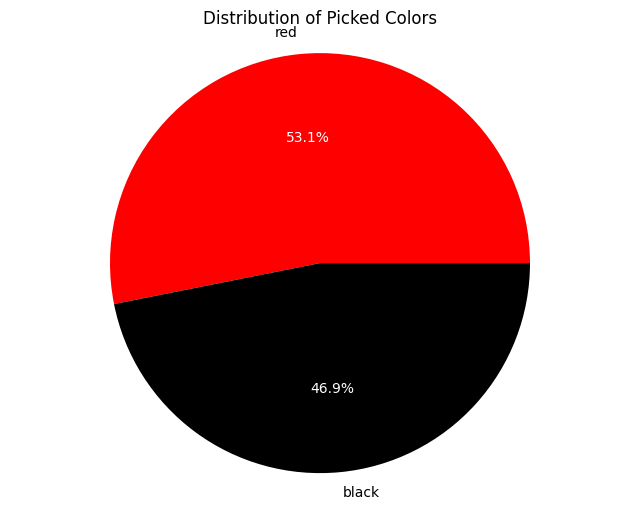

In [135]:
import pandas as pd
import matplotlib.pyplot as plt


correct_df = pd.read_csv('correct_predictions.csv')
incorrect_df = pd.read_csv('incorrect_predictions.csv')

df = pd.concat([correct_df, incorrect_df])


color_counts = df['Next_Card'].value_counts()


plt.figure(figsize=(8, 6))
patches, texts, autotexts = plt.pie(color_counts, labels=color_counts.index, autopct='%1.1f%%', colors=['red', 'black'], textprops={'color': 'black'})
plt.title('Distribution of Picked Colors')
plt.axis('equal') 

for autotext in autotexts:
    autotext.set_color('white')

plt.show()


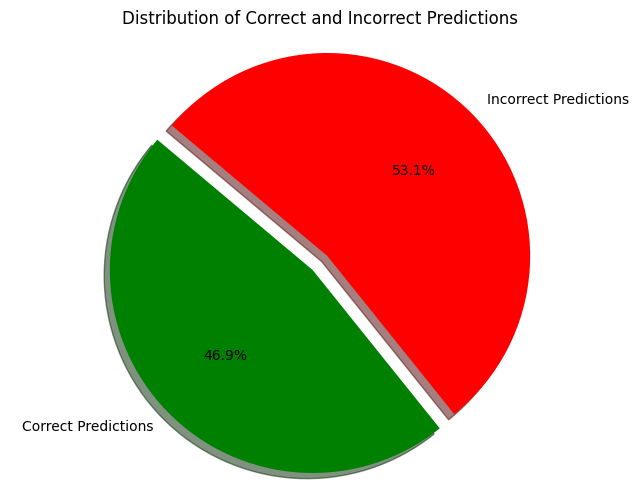

In [136]:
import pandas as pd
import matplotlib.pyplot as plt

correct_df = pd.read_csv('correct_predictions.csv')
incorrect_df = pd.read_csv('incorrect_predictions.csv')


correct_count = len(correct_df)
incorrect_count = len(incorrect_df)


labels = ['Correct Predictions', 'Incorrect Predictions']
sizes = [correct_count, incorrect_count]
colors = ['green', 'red']
explode = (0.1, 0)  

plt.figure(figsize=(8, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Distribution of Correct and Incorrect Predictions')
plt.axis('equal')  
plt.show()
